In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

paths = os.getcwd().split(os.sep)
paths[-2]='image'
paths[-1]='tulip.jpeg'
image_path = os.sep.join(paths)
# print(image_path)
if(os.path.exists(image_path)):
  print(image_path)
else:
  print("File not found")

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
N, M = img.shape
s = 64  # grid size

/home/silicon/opencv_learn/image/tulip.jpeg


In [20]:
def histogram_equalization_demo(image):
    """Histogram Equalization"""
    return cv2.equalizeHist(image)

def clahe_demo(image, clipLimit=2.0, tileGridSize=(8,8)):
    """Contrast Limited Adaptive Histogram Equalization (CLAHE)"""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)


def mozaik(img, s=64):
    N, M = img.shape
    output = np.zeros_like(img)

    for i in range(0, N, s):
        for j in range(0, M, s):
            block = img[i:i+s, j:j+s]
            
            if (i+j) % 3 == 0:
                enhanced = cv2.equalizeHist(block)  # HE
            elif (i+j) % 3 == 1:
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                enhanced = clahe.apply(block)      # CLAHE
            else:
                block_float = block.astype(np.float32)
                max=np.max(block_float)
                min=np.min(block_float)
                enhanced = ((block_float - min) / (max - min) * 255).astype(np.uint8)  # Normalization
            
            output[i:i+s, j:j+s] = enhanced

    return output

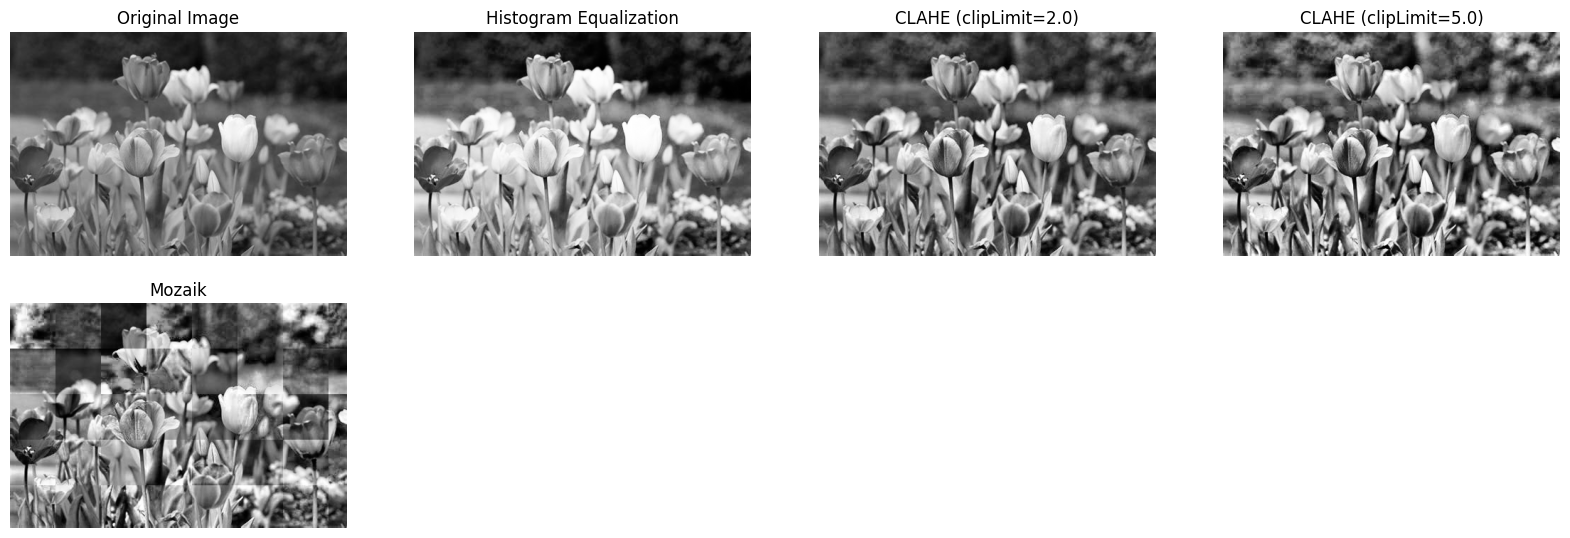

In [21]:


he = histogram_equalization_demo(img)
clahe = clahe_demo(img, clipLimit=2.0, tileGridSize=(8,8))
clahe_high = clahe_demo(img, clipLimit=5.0, tileGridSize=(8,8))
mozaik_img = mozaik(img, s=64)

plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(3,4,2)
plt.title('Histogram Equalization')
plt.imshow(he, cmap='gray')
plt.axis('off')

plt.subplot(3,4,3)
plt.title('CLAHE (clipLimit=2.0)')
plt.imshow(clahe, cmap='gray')
plt.axis('off')

plt.subplot(3,4,4)
plt.title('CLAHE (clipLimit=5.0)')
plt.imshow(clahe_high, cmap='gray')
plt.axis('off')

plt.subplot(3,4,5)
plt.title('Mozaik')
plt.imshow(mozaik_img, cmap='gray')
plt.axis('off')

plt.show()
